In [2]:
# Add Matplotlib inline magic command
%matplotlib inline
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# Reading the files and creating df

city_df=pd.read_csv("Resources/city_data.csv")
ride_df=pd.read_csv("Resources/ride_data.csv")

In [5]:
# Inspect city_df
# Rows with null value
city_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [6]:
# Inspect city_df
# Check datatype
city_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
# Inspect city_df
# No of cities for each type
city_df.groupby("type").count()

,city,driver_count
type,,
Rural,18,18
Suburban,36,36
Urban,66,66


In [11]:
# Inspect ride df
# Counting empty rows
ride_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
# Inspect ride df
# Datatype
ride_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [15]:
# Merge the dataframes
pyber_data_df=pd.merge(ride_df,city_df,how="left",on="city")
pyber_data_df.count()

city            2375
date            2375
fare            2375
ride_id         2375
driver_count    2375
type            2375
dtype: int64

In [19]:
# Create urban city df
urban_city_df=pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_city_df.tail()

,city,date,fare,ride_id,driver_count,type
1620,Reynoldsfurt,2019-02-14 11:25:10,39.40,9070692324754,67,Urban
1621,Christopherfurt,2019-03-13 01:47:52,32.05,2788817929605,41,Urban
1622,Raymondhaven,2019-03-20 02:20:34,38.53,8658255136559,11,Urban
1623,Port Johnbury,2019-03-26 07:22:45,7.63,8089282605778,3,Urban
1624,West Gabriel,2019-05-05 01:24:06,27.57,4428773411209,57,Urban


In [20]:
# Create suburban city df
suburban_city_df=pyber_data_df[pyber_data_df["type"]=="Suburban"]
suburban_city_df.tail()

,city,date,fare,ride_id,driver_count,type
2245,West Hannah,2019-03-02 17:06:03,13.92,7388937249208,12,Suburban
2246,Lake Robertside,2019-04-03 03:27:45,12.76,1301757653884,4,Suburban
2247,Colemanland,2019-01-10 06:49:58,27.70,8704067171414,23,Suburban
2248,East Marymouth,2019-02-12 23:18:53,47.41,7409660239158,5,Suburban
2249,New Raymond,2019-02-11 17:28:27,17.97,7551674475043,17,Suburban


In [22]:
# Create rural city df
rural_city_df=pyber_data_df[pyber_data_df["type"]=="Rural"]
rural_city_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [23]:
# Calculate ride count
urban_ride_count=urban_city_df.groupby("city").count()["ride_id"]
suburban_ride_count=suburban_city_df.groupby("city").count()["ride_id"]
rural_ride_count=rural_city_df.groupby("city").count()["ride_id"]

In [24]:
# Calculate average fare
urban_avg_fare=urban_city_df.groupby("city").mean()["fare"]
suburban_avg_fare=suburban_city_df.groupby("city").mean()["fare"]
rural_avg_fare=rural_city_df.groupby("city").mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [25]:
# Calculate average driver count
urban_driver_count=urban_city_df.groupby("city").mean()["driver_count"]
suburban_driver_count=suburban_city_df.groupby("city").mean()["driver_count"]
rural_driver_count=rural_city_df.groupby("city").mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

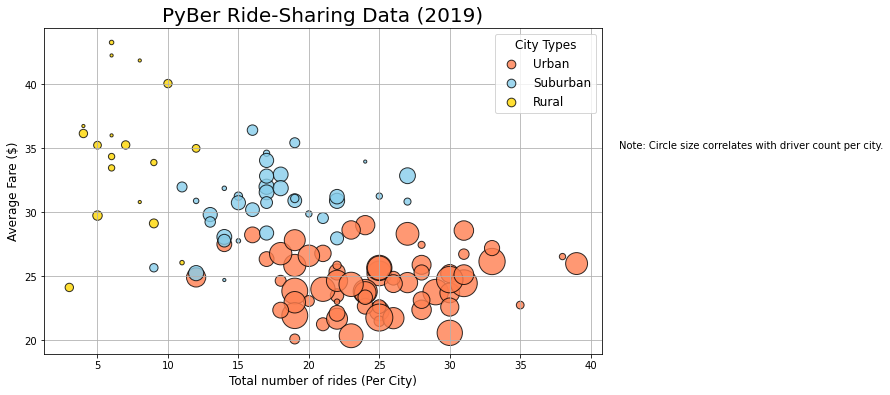

In [49]:
plt.figure(figsize=(10,6))

# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count, urban_avg_fare,s=10*urban_driver_count, color="coral",
            label="Urban",edgecolors="black",alpha=0.8,linewidths=1)

# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count, suburban_avg_fare,s=10*suburban_driver_count, color="skyblue",
            label="Suburban",edgecolors="black",alpha=0.8,linewidths=1)

# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count, rural_avg_fare,s=10*rural_driver_count, color="gold",
            label="Rural",edgecolors="black",alpha=0.8,linewidths=1)

plt.xlabel("Total number of rides (Per City)",fontsize=12)
plt.ylabel("Average Fare ($)",fontsize=12)
plt.title("PyBer Ride-Sharing Data (2019)",fontsize=20)
plt.grid()

# Create legend
lgnd=plt.legend(fontsize=12,mode="Expanded",scatterpoints=1,loc="best",title="City Types")
lgnd.legendHandles[0]._sizes=[75]
lgnd.legendHandles[1]._sizes=[75]
lgnd.legendHandles[2]._sizes=[75]
lgnd.get_title().set_fontsize(12)

# Add note to describe circle size
plt.text(42,35,"Note: Circle size correlates with driver count per city.")

#Save the figure
plt.savefig("analysis/fig1.png")

plt.show()